In [1]:
import dask

In [3]:
import dask.dataframe as dd

In [4]:
from dask.diagnostics import ProgressBar

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = dd.read_parquet("data.parquet")

In [8]:
df

,A,B
npartitions=1,,
,int64,int64
,...,...


[########################################] | 100% Completed | 106.63 ms


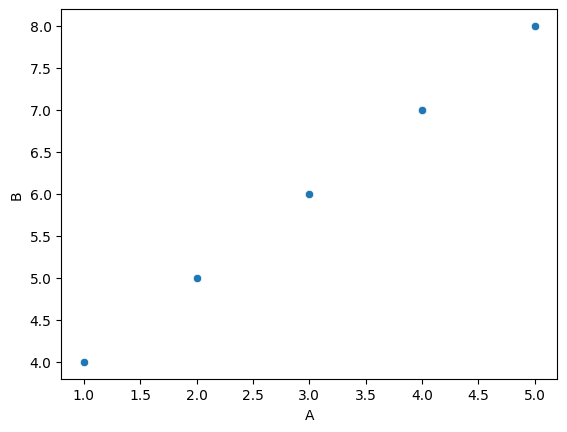

In [9]:
with ProgressBar():
    sns.scatterplot(x="A", y="B", data=df.compute())

In [10]:
import dask.array as da

In [11]:
import pandas as pd

In [12]:
df2 = pd.DataFrame({"X": da.random.normal(5,1,100), "Y": da.random.normal(7,3,100)})

In [13]:
df2_dask = dd.from_pandas(df2, npartitions=1)

In [14]:
df2_dask

,X,Y
npartitions=1,,
0,float64,float64
99,...,...


[########################################] | 100% Completed | 106.03 ms


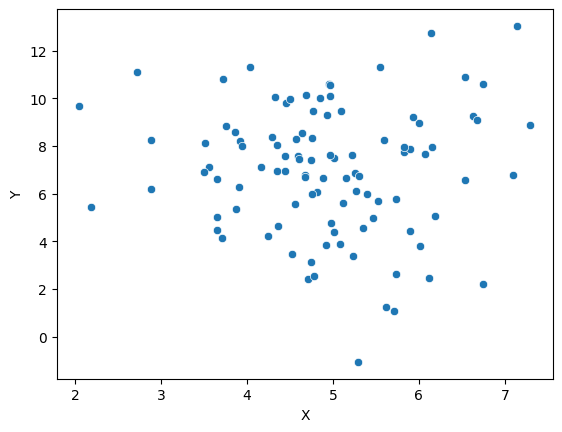

In [15]:
with ProgressBar():
    sns.scatterplot(x="X", y="Y", data=df2_dask.compute())

[########################################] | 100% Completed | 107.22 ms


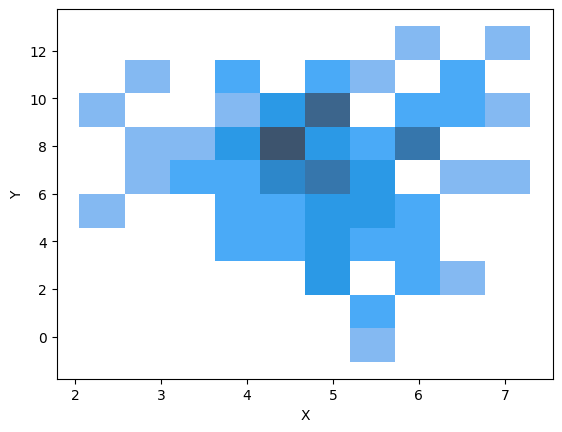

In [16]:
with ProgressBar():
    sns.histplot(x="X", y="Y", data=df2_dask.compute(), bins=10)

In [17]:
df2_dask_mean = df2_dask.mean().compute()

In [18]:
df2_dask_mean

X    4.921127
Y    6.991151
dtype: float64